In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.tree import DecisionTreeClassifier

In [104]:
df = pd.read_csv('Time-Wasters on Social Media.csv')

In [105]:
df.head(10)

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
7,8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
8,9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data
9,10,28,Other,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,2:00 PM,8,2,At home,Mobile Data


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [107]:
print(df.select_dtypes(include=['object']).columns)

Index(['Gender', 'Location', 'Profession', 'Demographics', 'Platform',
       'Video Category', 'Frequency', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'CurrentActivity', 'ConnectionType'],
      dtype='object')


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,40.986,13.497852,18.0,29.00,42.0,52.00,64.0
Income,1000.0,59524.213,23736.212925,20138.0,38675.25,58805.0,79792.25,99676.0
Total Time Spent,1000.0,151.406,83.952637,10.0,78.00,152.0,223.00,298.0
Number of Sessions,1000.0,10.013,5.380314,1.0,6.00,10.0,15.00,19.0
Video ID,1000.0,4891.738,2853.144258,11.0,2542.00,4720.5,7346.00,9997.0
Video Length,1000.0,15.214,8.224953,1.0,8.00,15.0,22.00,29.0
Engagement,1000.0,4997.159,2910.053701,15.0,2415.75,5016.0,7540.25,9982.0
Importance Score,1000.0,5.129,2.582834,1.0,3.00,5.0,7.00,9.0
Time Spent On Video,1000.0,14.973,8.200092,1.0,8.00,15.0,22.00,29.0


In [109]:
df.isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [110]:
df['Engagement']

0      7867
1      5944
2      8674
3      2477
4      3093
       ... 
995    5179
996    1803
997    9290
998    2050
999    9790
Name: Engagement, Length: 1000, dtype: int64

In [111]:
df['Debt']=df['Debt'].apply(lambda x : 1 if x==True else 0)

In [112]:
df['Owns Property'] = df['Owns Property'].apply(lambda x : 1 if x==True else 0)

In [113]:
encoder = LabelEncoder()
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda col: encoder.fit_transform(col))

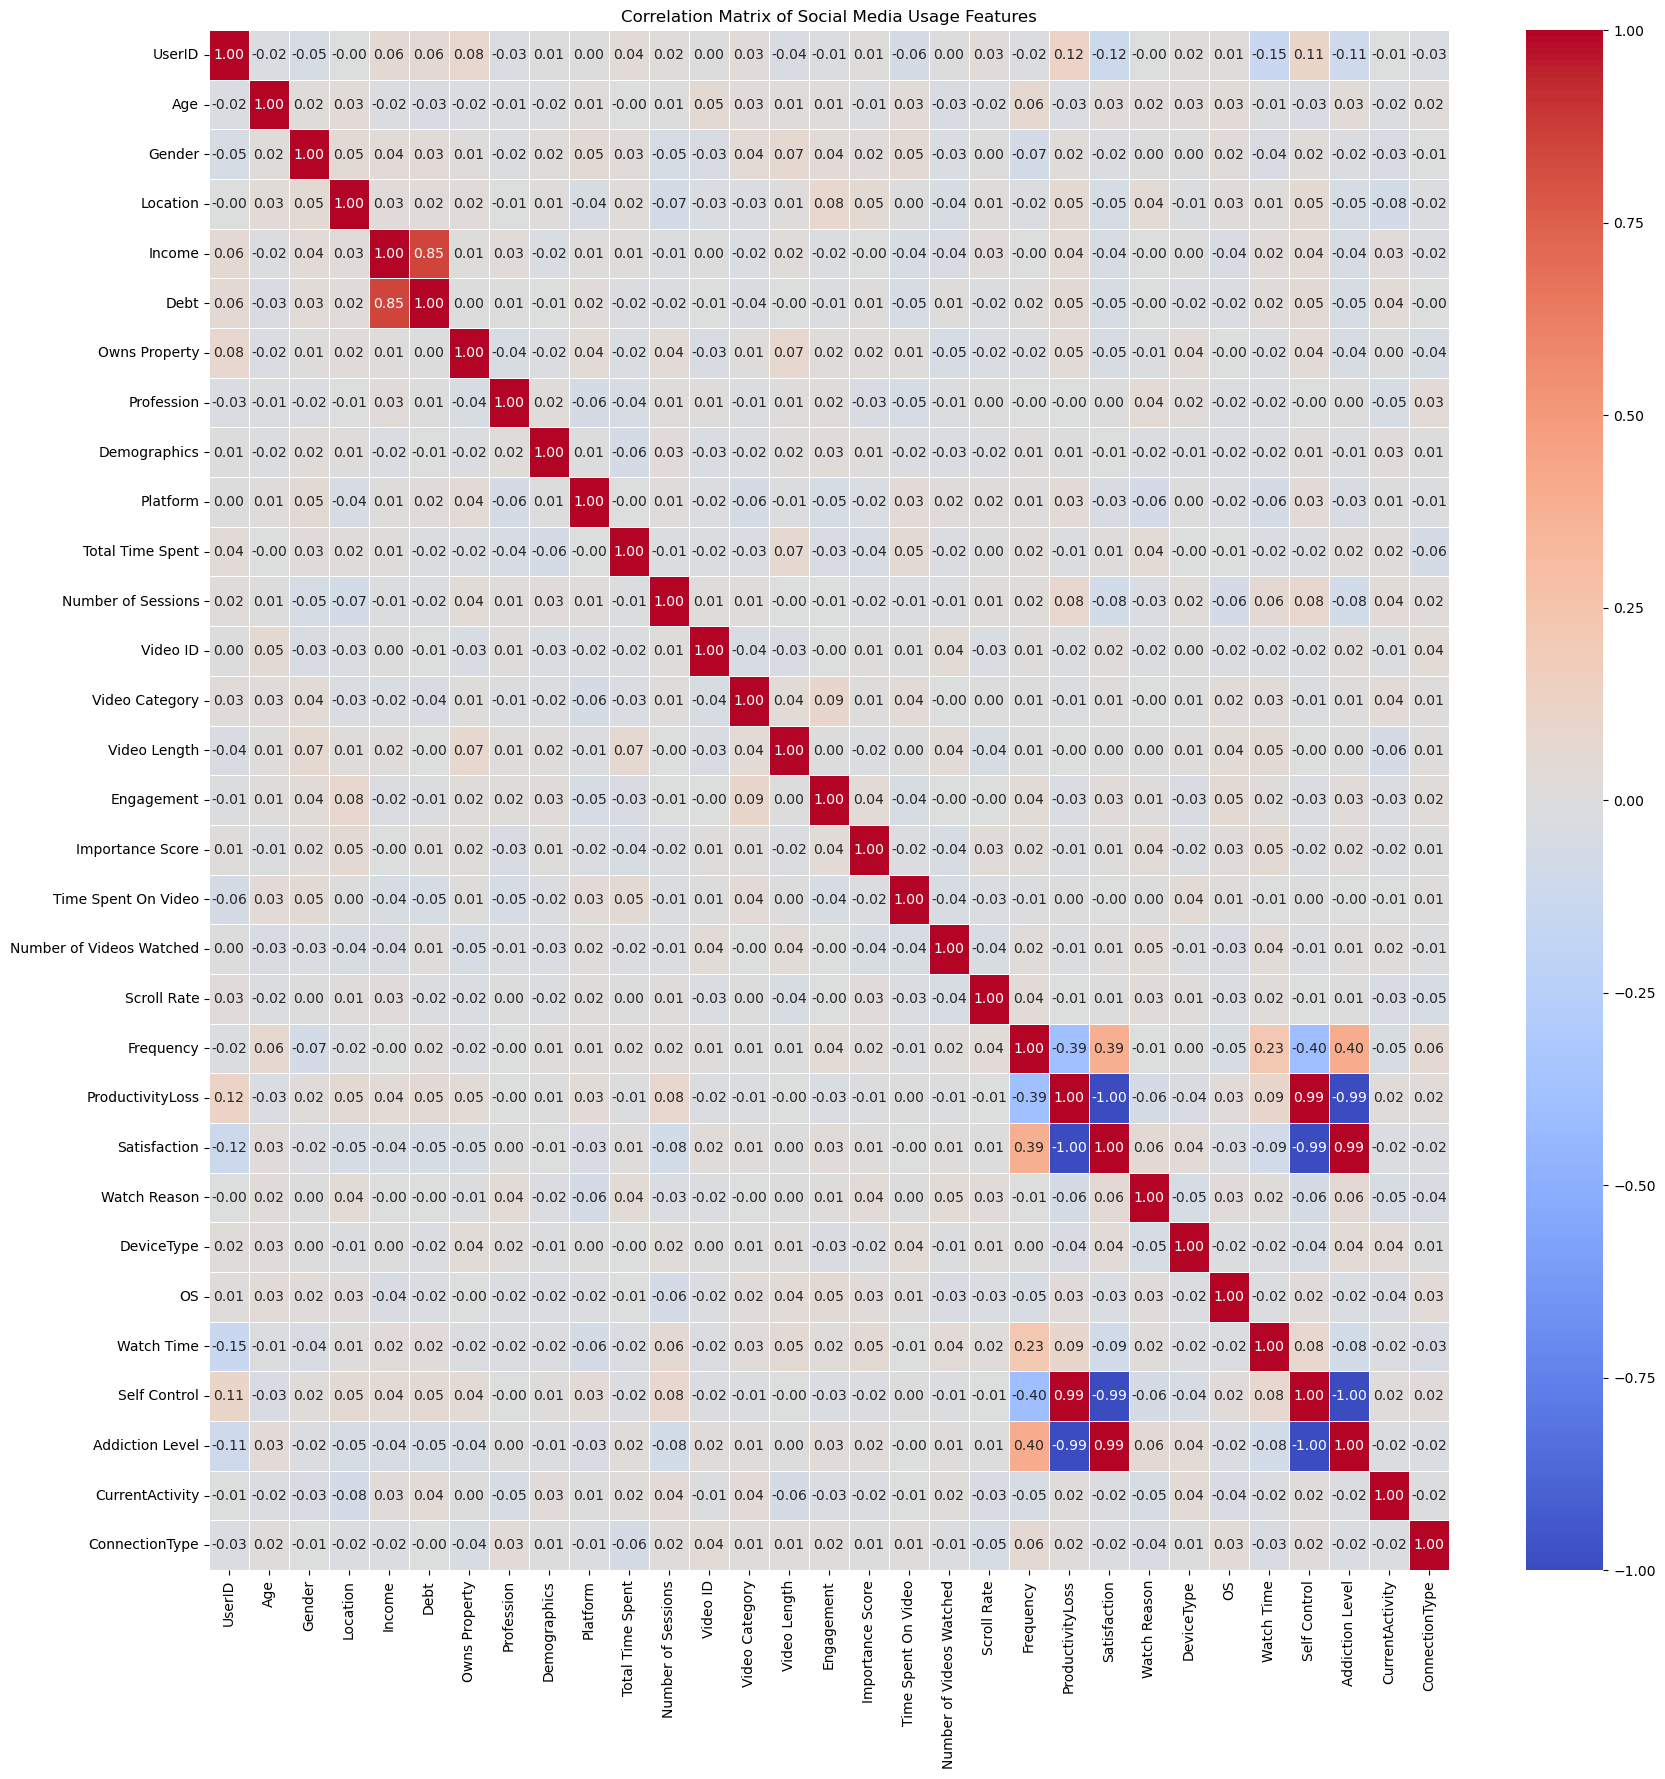

In [114]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Social Media Usage Features")
plt.show()

In [115]:
df.head(20)

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,1,6,82812,1,1,2,0,1,...,3,7,3,1,0,13,5,5,3,0
1,2,46,0,5,27999,0,1,0,1,1,...,5,5,2,0,0,6,7,3,1,1
2,3,32,0,8,42436,0,1,2,0,0,...,6,4,1,2,0,2,8,2,0,0
3,4,60,1,0,62963,1,0,7,0,3,...,3,7,2,1,0,13,5,5,3,0
4,5,25,1,6,22096,0,1,4,1,2,...,8,2,0,1,3,11,10,0,0,0
5,6,38,1,9,45279,0,0,8,1,1,...,3,7,1,0,0,13,5,5,0,1
6,7,56,1,2,46201,0,0,5,0,2,...,8,2,2,1,0,11,10,0,1,1
7,8,36,1,0,39715,0,0,2,0,1,...,3,7,1,2,0,13,5,5,0,0
8,9,40,1,8,49309,0,0,7,0,1,...,3,7,1,0,0,13,5,5,0,0
9,10,28,2,8,35078,0,0,5,0,3,...,6,4,0,1,3,2,8,2,0,0


## Target == Addiction Level

In [116]:
sc1 = ['Self Control','Watch Time','Frequency','Number of Videos Watched','Age','Total Time Spent']
x = df[sc1]
y = pd.DataFrame(df['Addiction Level'])

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [118]:
x_scaled

,Self Control,Watch Time,Frequency,Number of Videos Watched,Age,Total Time Spent
0,-1.017757,1.491561,1.315942,-0.231634,1.112882,-0.850977
1,-0.045687,-0.076852,-1.307198,0.410208,0.371652,0.912804
2,0.440348,-0.973088,-0.432818,-1.301370,-0.666069,-1.446849
3,-1.017757,1.491561,1.315942,1.123366,1.409373,-0.600710
4,1.412417,1.043443,0.441562,-0.302949,-1.184929,-0.183600
...,...,...,...,...,...,...
995,1.412417,0.147207,-1.307198,-0.588213,-1.407298,-0.088261
996,1.412417,-1.421206,1.315942,-0.588213,-0.073085,0.948557
997,1.412417,-1.421206,1.315942,0.196261,-1.036683,0.162006
998,-1.017757,-1.421206,1.315942,0.338893,1.483496,-0.004838


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=40)

In [120]:
m = DecisionTreeClassifier(random_state=5)

In [121]:
m.fit(X_train, y_train)
y_pred = m.predict(X_test)
with open('addiction.pkl', 'wb') as f:#wb is write binary
    pickle.dump(m, f)
acc = accuracy_score(y_test, y_pred)*100

In [122]:
acc

100.0

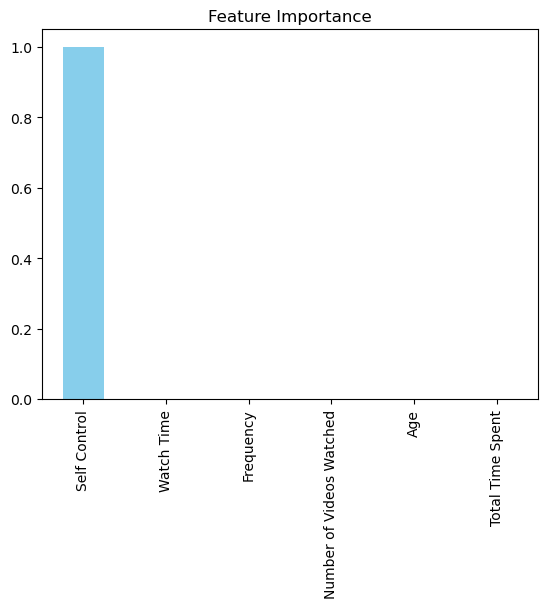

In [123]:
pd.Series(m.feature_importances_, index=x_scaled.columns).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.show()

## Target == Satisfaction

In [124]:
sc2 = ['Self Control','Watch Time','Frequency','Income','Scroll Rate','Number of Sessions','Age']
x1 = df[sc2]
y1 = pd.DataFrame(df['Satisfaction'])

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled1, y1, test_size=0.2, random_state=42)

In [127]:
n = RandomForestClassifier(random_state=40)

In [128]:
n.fit(X_train, y_train)
y_pred = n.predict(X_test)

acc = accuracy_score(y_test, y_pred)

D:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [129]:
acc*100

95.5

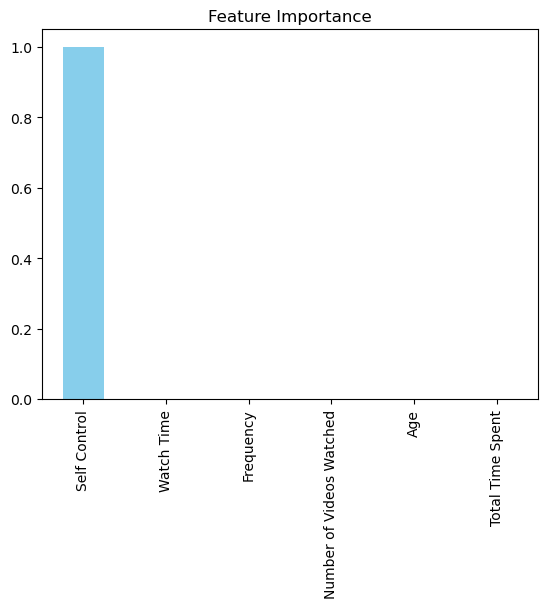

In [130]:
pd.Series(m.feature_importances_, index=x_scaled.columns).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.show()

In [131]:
pickle.dump(n, open('satisfaction.pkl', 'wb'))

## Target==ProductivityLoss

In [132]:
df['ProductivityLoss'].value_counts()

ProductivityLoss
6    247
3    228
5    158
8    145
7     60
1     55
9     37
4     36
2     34
Name: count, dtype: int64

In [133]:
q1 = ['Satisfaction','Addiction Level','Watch Time','Frequency']
x2 = df[q1]
y2 = pd.DataFrame(df['ProductivityLoss'])

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x2), columns=x2.columns)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y2, test_size=0.2, random_state=42)

In [136]:
q = RandomForestClassifier(random_state=40)

In [137]:
q.fit(X_train, y_train)
y_pred = q.predict(X_test)

acc = accuracy_score(y_test, y_pred)

D:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


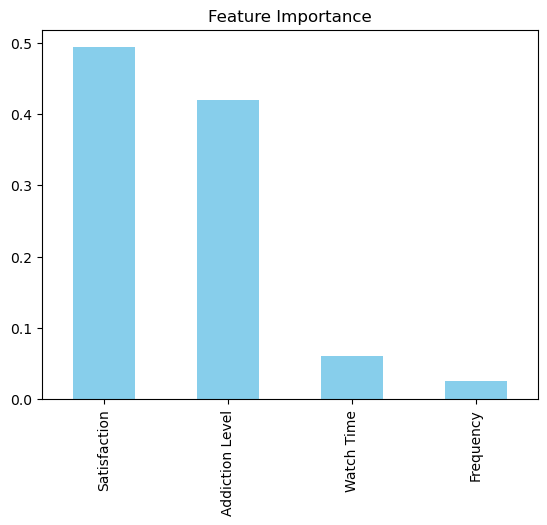

In [138]:
pd.Series(q.feature_importances_, index=x_scaled.columns).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.show()

In [139]:
acc*100

99.5

In [140]:
pickle.dump(q, open('productivity.pkl', 'wb'))

In [141]:
!mkdir -p templates


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file templates already exists.
Error occurred while processing: templates.


# Index file

In [142]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Predict Social Media Impact</title>
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;600&display=swap" rel="stylesheet">
  <style>
    body {
      margin: 0;
      font-family: 'Poppins', sans-serif;
      background: linear-gradient(to right, #6a11cb, #2575fc);
      color: white;
      display: flex;
      flex-direction: column;
      align-items: center;
      justify-content: center;
      height: 100vh;
    }
    h1 {
      font-size: 2.5rem;
      margin-bottom: 30px;
      animation: fadeInDown 1s ease;
    }
    form {
      background: rgba(255, 255, 255, 0.1);
      padding: 30px 40px;
      border-radius: 15px;
      box-shadow: 0 8px 20px rgba(0,0,0,0.2);
      backdrop-filter: blur(10px);
      animation: fadeInUp 1s ease;
    }
    select, button {
      font-size: 1rem;
      padding: 10px 15px;
      margin-top: 10px;
      width: 100%;
      border-radius: 8px;
      border: none;
      outline: none;
    }
    select {
      margin-bottom: 20px;
    }
    button {
      background: #ffffff;
      color: #2575fc;
      font-weight: bold;
      cursor: pointer;
      transition: background 0.3s ease;
    }
    button:hover {
      background: #e0e0e0;
    }

    @keyframes fadeInDown {
      from { opacity: 0; transform: translateY(-30px); }
      to { opacity: 1; transform: translateY(0); }
    }

    @keyframes fadeInUp {
      from { opacity: 0; transform: translateY(30px); }
      to { opacity: 1; transform: translateY(0); }
    }
  </style>
</head>
<body>
  <h1>🔮 Predict Social Media Impact</h1>
  <form action="/form" method="post">
    <label for="target">Choose what you want to predict:</label>
    <select name="target" id="target">
      <option value="addiction">Addiction Level</option>
      <option value="satisfaction">Satisfaction</option>
      <option value="productivity">Productivity Loss</option>
    </select>
    <button type="submit">Continue</button>
  </form>
</body>
</html>


Overwriting templates/index.html


# form file

In [143]:
%%writefile templates/form.html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>{{ target.title() }} Prediction</title>
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;600&display=swap" rel="stylesheet">
  <style>
    body {
      margin: 0;
      font-family: 'Poppins', sans-serif;
      background: linear-gradient(to right, #43cea2, #185a9d);
      color: white;
      display: flex;
      flex-direction: column;
      align-items: center;
      justify-content: center;
      height: 100vh;
      padding: 20px;
    }
    h2 {
      font-size: 2rem;
      margin-bottom: 20px;
      animation: fadeInDown 0.8s ease;
      text-align: center;
    }
    form {
      background: rgba(255, 255, 255, 0.1);
      padding: 30px;
      border-radius: 15px;
      box-shadow: 0 8px 20px rgba(0,0,0,0.2);
      backdrop-filter: blur(10px);
      width: 100%;
      max-width: 400px;
      animation: fadeInUp 1s ease;
    }
    label {
      display: block;
      margin-top: 15px;
      font-weight: 600;
    }
    input[type="text"] {
      width: 100%;
      padding: 10px;
      border-radius: 8px;
      border: none;
      margin-top: 5px;
      outline: none;
    }
    button {
      width: 100%;
      margin-top: 25px;
      padding: 12px;
      background: #ffffff;
      color: #185a9d;
      font-weight: bold;
      border: none;
      border-radius: 8px;
      cursor: pointer;
      transition: background 0.3s ease;
    }
    button:hover {
      background: #e0e0e0;
    }
    @keyframes fadeInDown {
      from { opacity: 0; transform: translateY(-30px); }
      to { opacity: 1; transform: translateY(0); }
    }
    @keyframes fadeInUp {
      from { opacity: 0; transform: translateY(30px); }
      to { opacity: 1; transform: translateY(0); }
    }
  </style>
</head>
<body>
  <h2>🔍 Enter Data for {{ target.title() }} Prediction</h2>
  <form action="/predict" method="post">
    <input type="hidden" name="target" value="{{ target }}">
    {% for feature in features %}
      <label for="{{ feature }}">{{ feature_descriptions[feature] }}</label>
      <input type="text" name="{{ feature }}" id="{{ feature }}" required>
    {% endfor %}
    <button type="submit">🔮 Predict</button>
  </form>
</body>
</html>


Overwriting templates/form.html


# result file

In [144]:
%%writefile templates/result.html
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Prediction Result</title>
  <link href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;600&display=swap" rel="stylesheet">
  <style>
    body {
      margin: 0;
      font-family: 'Poppins', sans-serif;
      background: linear-gradient(to right, #f7971e, #ffd200);
      color: #333;
      display: flex;
      flex-direction: column;
      align-items: center;
      justify-content: center;
      height: 100vh;
      text-align: center;
    }

    h2 {
      font-size: 2.5rem;
      background: rgba(255, 255, 255, 0.8);
      padding: 20px 30px;
      border-radius: 15px;
      box-shadow: 0 8px 20px rgba(0,0,0,0.1);
      animation: fadeInDown 0.8s ease;
    }

    a {
      display: inline-block;
      margin-top: 30px;
      text-decoration: none;
      color: #f7971e;
      background-color: white;
      padding: 12px 20px;
      border-radius: 8px;
      font-weight: bold;
      transition: background 0.3s ease;
    }

    a:hover {
      background-color: #f1f1f1;
    }

    @keyframes fadeInDown {
      from { opacity: 0; transform: translateY(-30px); }
      to { opacity: 1; transform: translateY(0); }
    }
  </style>
</head>
<body>
  <h2>🔮 Prediction: {{ prediction }}</h2>
  <a href="/">⬅ Go Back</a>
</body>
</html>


Overwriting templates/result.html


In [145]:
%%writefile app.py
from flask import Flask, render_template, request
import pickle
import numpy as np
#from pyngrok import ngrok

app = Flask(__name__, template_folder='templates')

# Load models
model_addiction = pickle.load(open('addiction.pkl', 'rb'))
model_satisfaction = pickle.load(open('satisfaction.pkl', 'rb'))
model_productivity = pickle.load(open('productivity.pkl', 'rb'))

# Feature sets
features_map = {
    'addiction': ['Self Control', 'Watch Time', 'Frequency', 'Number of Videos Watched', 'Age', 'Total Time Spent'],
    'satisfaction': ['Self Control', 'Watch Time', 'Frequency', 'Income', 'Scroll Rate', 'Number of Sessions', 'Age'],
    'productivity': ['Satisfaction', 'Addiction Level', 'Watch Time', 'Frequency']
}
feature_descriptions = {
    'Self Control': 'Self Control – How well do you manage your screen time? (0-10)',
    'Watch Time': 'Watch Time – Average time spent watching per session (in minutes)',
    'Frequency': 'Frequency – How often do you use the platform daily? (0-3)',
    'Number of Videos Watched': 'Number of Videos Watched – Total per day',
    'Age': 'Age – Your current age',
    'Total Time Spent': 'Total Time Spent – Total hours spent per day on the platform',
    'Income': 'Income – Monthly income in USD',
    'Scroll Rate': 'Scroll Rate – How fast do you scroll (e.g., videos/min)',
    'Number of Sessions': 'Number of Sessions – Times you open the app daily',
    'Satisfaction': 'Satisfaction – Your satisfaction level with the content (1-8)',
    'Addiction Level': 'Addiction Level – Perceived level of addiction to social media (0-7)'
}

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/form', methods=['POST'])
def form():
    target = request.form['target']
    features = features_map.get(target, [])
    return render_template('form.html', target=target, features=features, feature_descriptions=feature_descriptions)

@app.route('/predict', methods=['POST'])
def predict():
    target = request.form['target']
    features = features_map.get(target, [])

    try:
        input_data = [float(request.form[feature]) for feature in features]
        input_array = np.array([input_data])

        if target == 'addiction':
            prediction = model_addiction.predict(input_array)[0]
        elif target == 'satisfaction':
            prediction = model_satisfaction.predict(input_array)[0]
        elif target == 'productivity':
            prediction = model_productivity.predict(input_array)[0]
        else:
            prediction = 'Invalid target'

        return render_template('result.html', prediction=prediction)

    except Exception as e:
        return f"Error: {str(e)}"
'''
if __name__ == '__main__':
    port = 5000
    public_url = ngrok.connect(port)
    print(f"🌍 Public URL: {public_url}")  # Access your app using this
    app.run(port=port)
'''
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=10000)


Overwriting app.py
